In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from lafomo.utilities import save, load, is_cuda
from lafomo.gp.variational.models import MultiLFM
from lafomo.gp.variational.trainer import TranscriptionalTrainer
from lafomo.data_loaders.datasets import ArtificialData
from lafomo.plot.variational_plotters import Plotter
from lafomo.gp.variational.options import VariationalOptions


In [2]:
dataset = ArtificialData()

num_genes = dataset.num_genes
num_tfs = dataset.num_tfs
gene_names = np.arange(num_genes)
t_inducing = torch.linspace(0, 1, 7, dtype=torch.float64).reshape((-1, 1))
t_observed = dataset.t.view(-1)
print('Inducing points', t_inducing.shape)
print(gene_names.shape)



Inducing points torch.Size([7, 1])
(20,)


In [3]:
options = VariationalOptions(
    learn_inducing=False,
    num_samples=50,
    kernel_scale=False,
)

model = MultiLFM(num_genes, num_tfs, t_inducing, dataset, options)
model = model.cuda() if is_cuda() else model

optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = TranscriptionalTrainer(model, optimizer, dataset)
plotter = Plotter(model, gene_names)

print(t_observed.shape, dataset[0][1].shape)

torch.Size([10]) torch.Size([10])


C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=options.learn_inducing)
C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.initial_conditions = Parameter(torch.tensor(torch.zeros(self.num_outputs, 1)), requires_grad=True)


### Outputs prior to training:

torch.Size([1, 20, 10])


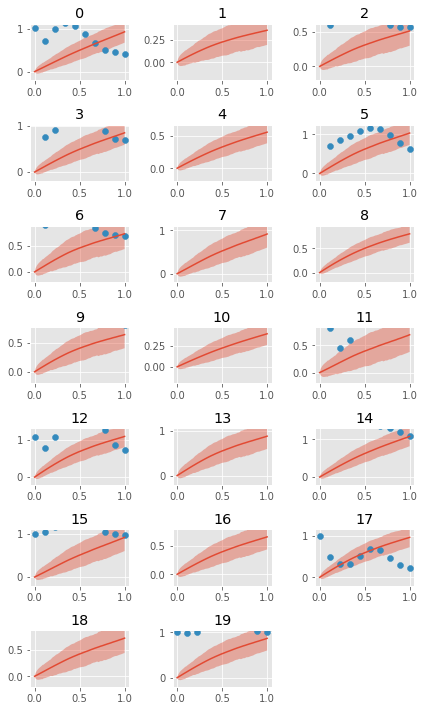

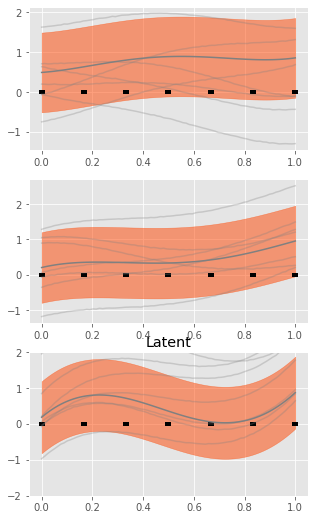

In [4]:
t_predict = torch.linspace(0, 1, 80)
rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol
}
print(dataset.m_observed.shape)
plotter.plot_outputs(t_predict, t_scatter=t_observed, y_scatter=dataset.m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict)

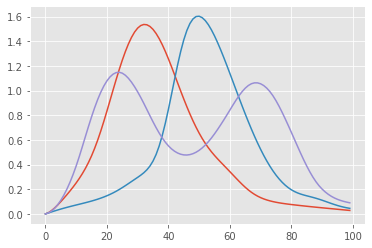

In [5]:
for i in range(num_tfs):
    plt.plot(dataset.f_observed[i])

Epoch 731/930 - Loss: -478.44 (-520.38 41.94) λ: 0.028 b: 0.92 d 3.79 s: 3.85
Epoch 741/930 - Loss: -511.02 (-552.39 41.37) λ: 0.028 b: 0.90 d 3.81 s: 3.85
Epoch 751/930 - Loss: -496.99 (-537.83 40.84) λ: 0.028 b: 0.90 d 3.80 s: 3.87
Epoch 761/930 - Loss: -509.97 (-550.55 40.58) λ: 0.028 b: 0.90 d 3.81 s: 3.89
Epoch 771/930 - Loss: -576.29 (-616.73 40.44) λ: 0.028 b: 0.89 d 3.82 s: 3.89
Epoch 781/930 - Loss: -576.27 (-616.09 39.82) λ: 0.028 b: 0.92 d 3.79 s: 3.94
Epoch 791/930 - Loss: -521.24 (-561.89 40.65) λ: 0.028 b: 0.87 d 3.85 s: 3.91
Epoch 801/930 - Loss: -497.99 (-538.73 40.75) λ: 0.028 b: 0.88 d 3.87 s: 3.91
Epoch 811/930 - Loss: -522.11 (-562.69 40.57) λ: 0.028 b: 0.93 d 3.85 s: 3.94
Epoch 821/930 - Loss: -535.68 (-575.70 40.01) λ: 0.028 b: 0.90 d 3.89 s: 3.93
Epoch 831/930 - Loss: -498.41 (-538.26 39.85) λ: 0.028 b: 0.92 d 3.88 s: 3.94
Epoch 841/930 - Loss: -528.99 (-568.68 39.69) λ: 0.028 b: 0.94 d 3.87 s: 3.95
Epoch 851/930 - Loss: -431.59 (-471.20 39.61) λ: 0.028 b: 0.95 d

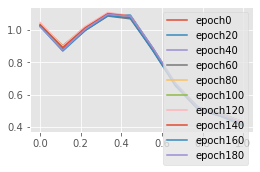

In [20]:
import time
start = time.time()
tol = 5e-4
output = trainer.train(200, rtol=tol, atol=tol/10, report_interval=10, plot_interval=20)
end = time.time()
print(end - start)



### Outputs after training

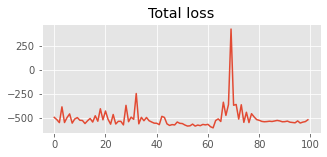

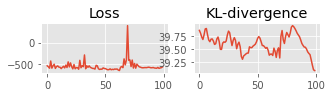

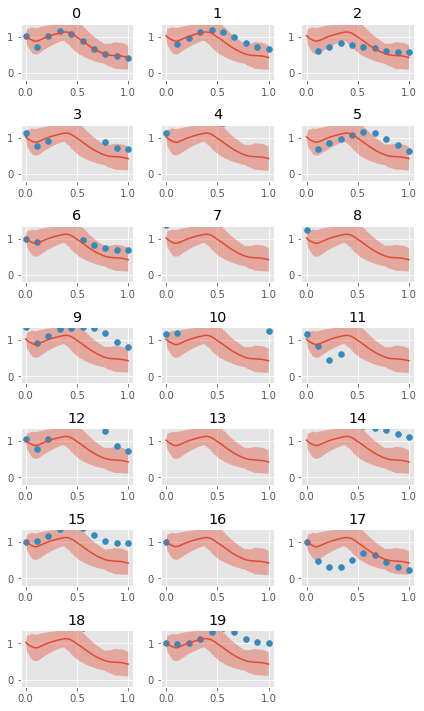

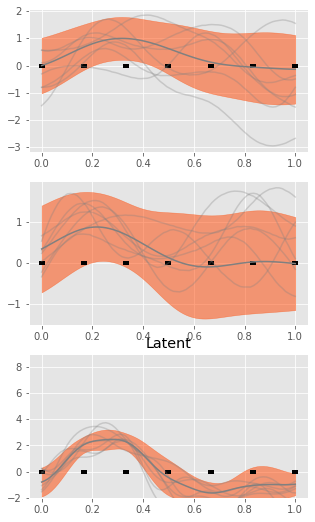

In [21]:
plotter.plot_losses(trainer, last_x=100)
plotter.plot_outputs(t_predict, t_scatter=t_observed, y_scatter=dataset.m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 9))

In [15]:
print(model.w)

Parameter containing:
tensor([[ 3.9808,  2.6847, 18.2781],
        [ 3.2564,  2.2471, 16.5538],
        [ 3.4624,  2.4628, 16.8202],
        [ 4.0308,  3.1599, 16.3110],
        [ 3.3772,  2.3657, 16.6543],
        [ 4.0288,  2.7113, 13.4965],
        [ 4.1308,  3.1486, 17.1189],
        [ 4.0571,  3.0652, 17.4455],
        [ 4.2414,  2.8753, 15.1665],
        [ 3.9928,  3.0325, 16.9301],
        [ 3.7448,  2.3311, 17.2479],
        [ 3.6096,  2.3959, 17.2454],
        [ 4.0071,  2.7344, 14.4174],
        [ 4.0896,  2.8476, 15.2228],
        [ 4.1807,  2.8934, 16.3141],
        [ 4.2312,  3.3205, 17.3796],
        [ 3.9346,  2.7623, 18.4192],
        [ 3.8416,  2.9149, 15.1009],
        [ 3.4647,  2.0503, 17.7837],
        [ 3.8375,  3.1083, 15.6298]], dtype=torch.float64, requires_grad=True)


In [ ]:
save(model, 'multitf')

